In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

# Use a professional font and improve overall aesthetics
mpl.rcParams.update({
    "text.usetex": False,  # Set to True if using LaTeX rendering
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 300,
    "lines.linewidth": 2,
    "lines.markersize": 6,
})


# Define styles
styles = {
    "QED-FCI": {"color": "dodgerblue", "linestyle": "-", "marker": "o", "markerfacecolor": "dodgerblue"},
    "QED-CASCI": {"color": "rebeccapurple", "linestyle": "-", "marker": "s", "markerfacecolor":"none"},
    "QED-CASSCF": {"color": "orangered", "linestyle": "-", "marker": "^", "markerfacecolor":"none"},
}




In [2]:
# Load the molecule data from the JSON file
with open("LiH_qedcas_4e_9o_10ph_lz_0.05_om_0.12086.json", 'r') as json_file:
    LiH_cas_data = json.load(json_file)

with open("LiH_qedcasci_4e_9o_10ph_lz_0.05_om_0.12086.json", "r") as json_file:
    LiH_casci_data = json.load(json_file)

with open("LiH_qedfci_10ph_lz_0.05_om_0.12086.json", 'r') as json_file:
    LiH_fci_data = json.load(json_file)


In [3]:
r = np.linspace(1.0, 3.0, 21)
#E_casscf_min = np.array(LiH_cas_min_data["return_results"]["casscf_energies"])
#E_casci_min =  np.array(LiH_cas_min_data["return_results"]["casci_energies"])
E_casci = np.array(LiH_casci_data["return_results"]["casci_energies"])
E_casscf = np.array(LiH_cas_data["return_results"]["casscf_energies"])
E_fci = np.array(LiH_fci_data["return_results"]["fci_energies"])

print(np.shape(E_fci))
print(np.shape(E_casci))
print(np.shape(E_casscf))


(21, 6)
(21, 6)
(21, 6)


In [13]:
# compute MAE for CASSCF and CASCI for each statee
au_to_kcal = 627.509474 
mae_casscf_g = np.mean( np.abs( E_casscf[:,0] - E_fci[:,0] ) ) * au_to_kcal
mae_casci_g = np.mean( np.abs( E_casci[:,0] - E_fci[:,0] ) ) * au_to_kcal

mae_casscf_lp = np.mean( np.abs( E_casscf[:,2] - E_fci[:,2] ) ) * au_to_kcal
mae_casci_lp = np.mean( np.abs( E_casci[:,2] - E_fci[:,2] ) ) * au_to_kcal

mae_casscf_up = np.mean( np.abs( E_casscf[:,3] - E_fci[:,3] ) ) * au_to_kcal
mae_casci_up = np.mean( np.abs( E_casci[:,3] - E_fci[:,3] ) ) * au_to_kcal

In [16]:
au_to_kcal = 627.509474 

# Compute MAEs
mae_casscf_g  = np.mean( np.abs( E_casscf[:,0] - E_fci[:,0] ) ) * au_to_kcal
mae_casci_g   = np.mean( np.abs( E_casci[:,0]  - E_fci[:,0] ) ) * au_to_kcal

mae_casscf_lp = np.mean( np.abs( E_casscf[:,2] - E_fci[:,2] ) ) * au_to_kcal
mae_casci_lp  = np.mean( np.abs( E_casci[:,2]  - E_fci[:,2] ) ) * au_to_kcal

mae_casscf_up = np.mean( np.abs( E_casscf[:,3] - E_fci[:,3] ) ) * au_to_kcal
mae_casci_up  = np.mean( np.abs( E_casci[:,3]  - E_fci[:,3] ) ) * au_to_kcal

# Print LaTeX table with escaped braces
print(r"""\begin{{table}}[h]
\centering
\begin{{tabular}}{{lcc}}
\toprule
State & QED-CASCI MAE (kcal/mol) & QED-CASSCF MAE (kcal/mol) \\
\midrule
Ground         & {:.3f} & {:.3f} \\
Lower polariton & {:.3f} & {:.3f} \\
Upper polariton & {:.3f} & {:.3f} \\
\bottomrule
\end{{tabular}}
\caption{{Mean absolute errors (MAE) in kcal/mol between QED-CASCI/QED-CASSCF and exact FCI reference energies for three polaritonic states.}}
\label{{tab:mae_qed}}
\end{{table}}
""".format(mae_casci_g,  mae_casscf_g,
           mae_casci_lp, mae_casscf_lp,
           mae_casci_up, mae_casscf_up))

\begin{table}[h]
\centering
\begin{tabular}{lcc}
\toprule
State & QED-CASCI MAE (kcal/mol) & QED-CASSCF MAE (kcal/mol) \\
\midrule
Ground         & 23.181 & 1.055 \\
Lower polariton & 30.286 & 0.905 \\
Upper polariton & 28.326 & 0.723 \\
\bottomrule
\end{tabular}
\caption{Mean absolute errors (MAE) in kcal/mol between QED-CASCI/QED-CASSCF and exact FCI reference energies for three polaritonic states.}
\label{tab:mae_qed}
\end{table}



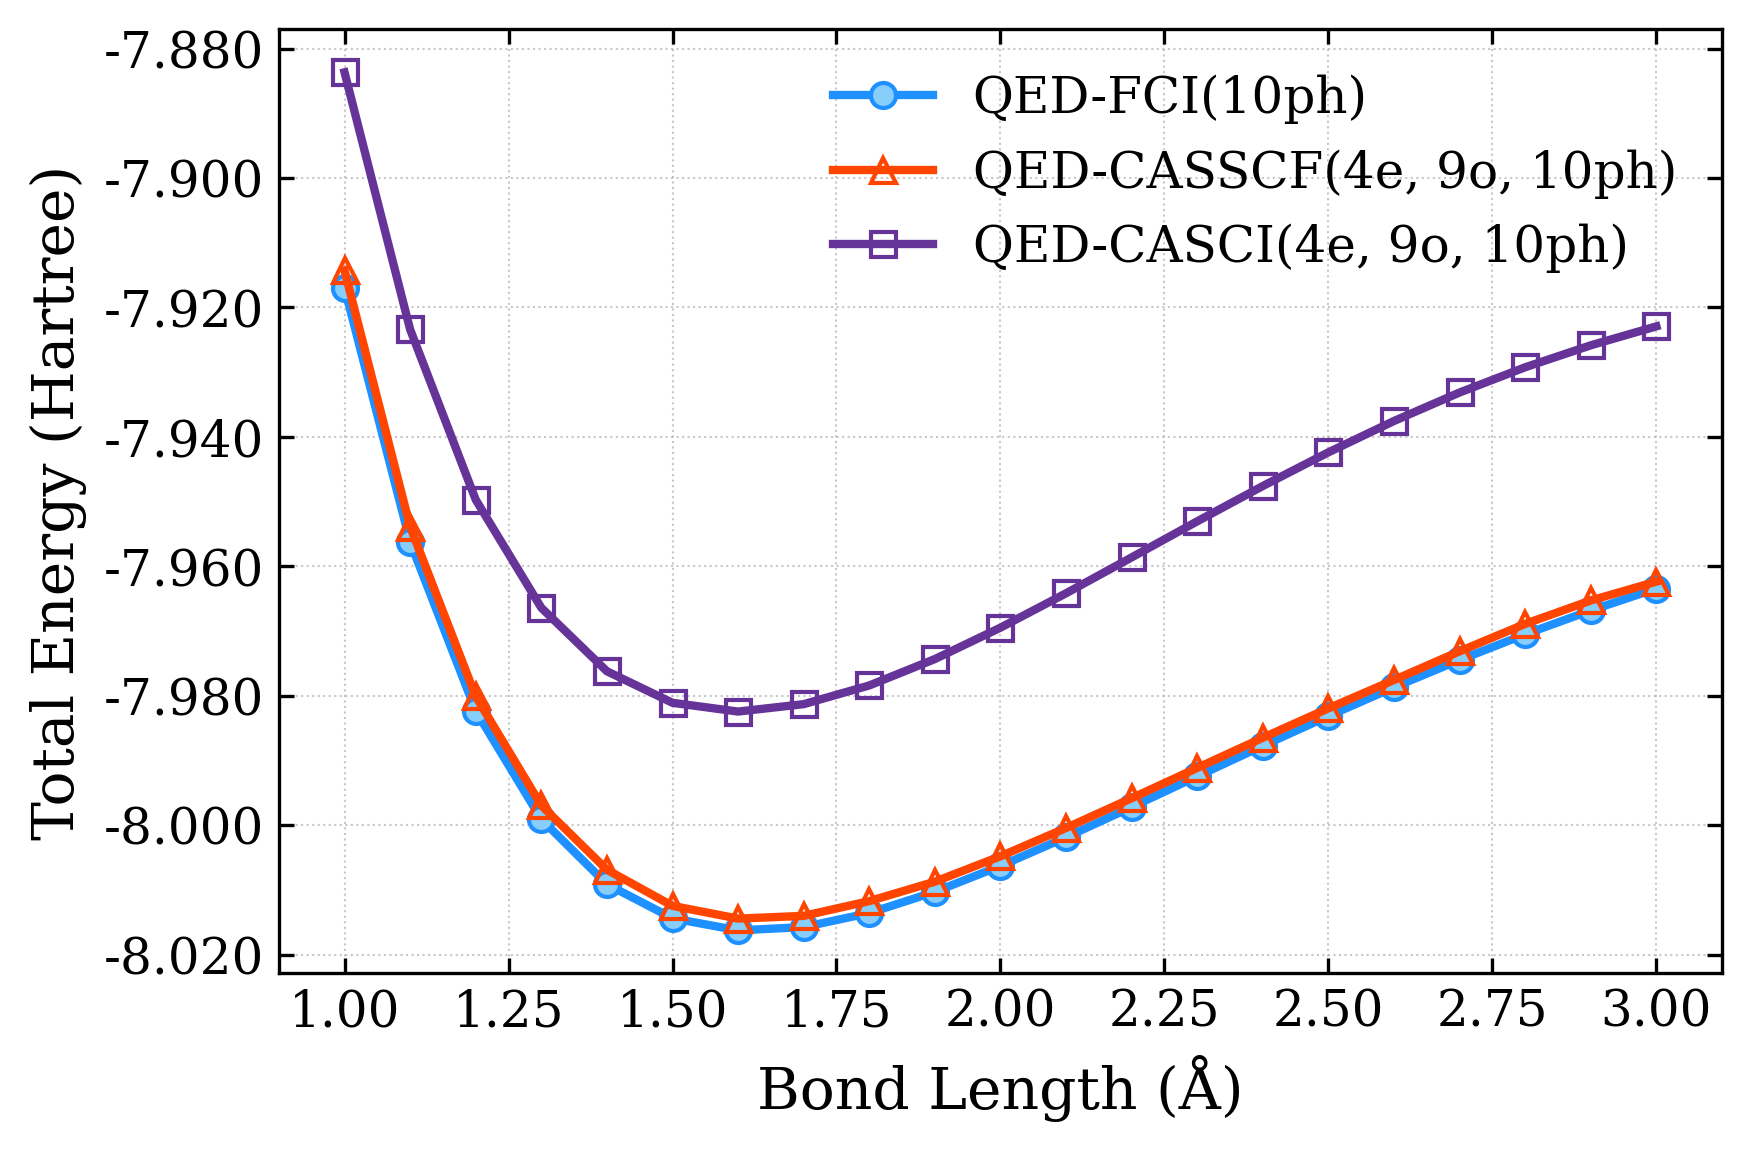

In [4]:

from matplotlib.ticker import FormatStrFormatter
# Define styles
styles = {
    "QED-FCI": {"color": "dodgerblue", "linestyle": "-", "marker": "o", "markerfacecolor": "lightskyblue"},
    "QED-CASCI": {"color": "rebeccapurple", "linestyle": "-", "marker": "s", "markerfacecolor": "none"},
    "QED-CASSCF": {"color": "orangered", "linestyle": "-", "marker": "^", "markerfacecolor": "none"},
}

# plot the polariton states with CASSCF and DMRG

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(r, E_fci[:,0],label=r"QED-FCI(10ph)", **styles["QED-FCI"])
ax.plot(r, E_casscf[:,0],label=r"QED-CASSCF(4e, 9o, 10ph)", **styles["QED-CASSCF"])
ax.plot(r, E_casci[:,0], label=r"QED-CASCI(4e, 9o, 10ph)", **styles["QED-CASCI"])
# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
# Set x-axis tick labels to display 3 decimal places
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)
fig.tight_layout()
fig.savefig("LiH_GS.png", format='png', dpi=600)
plt.show()

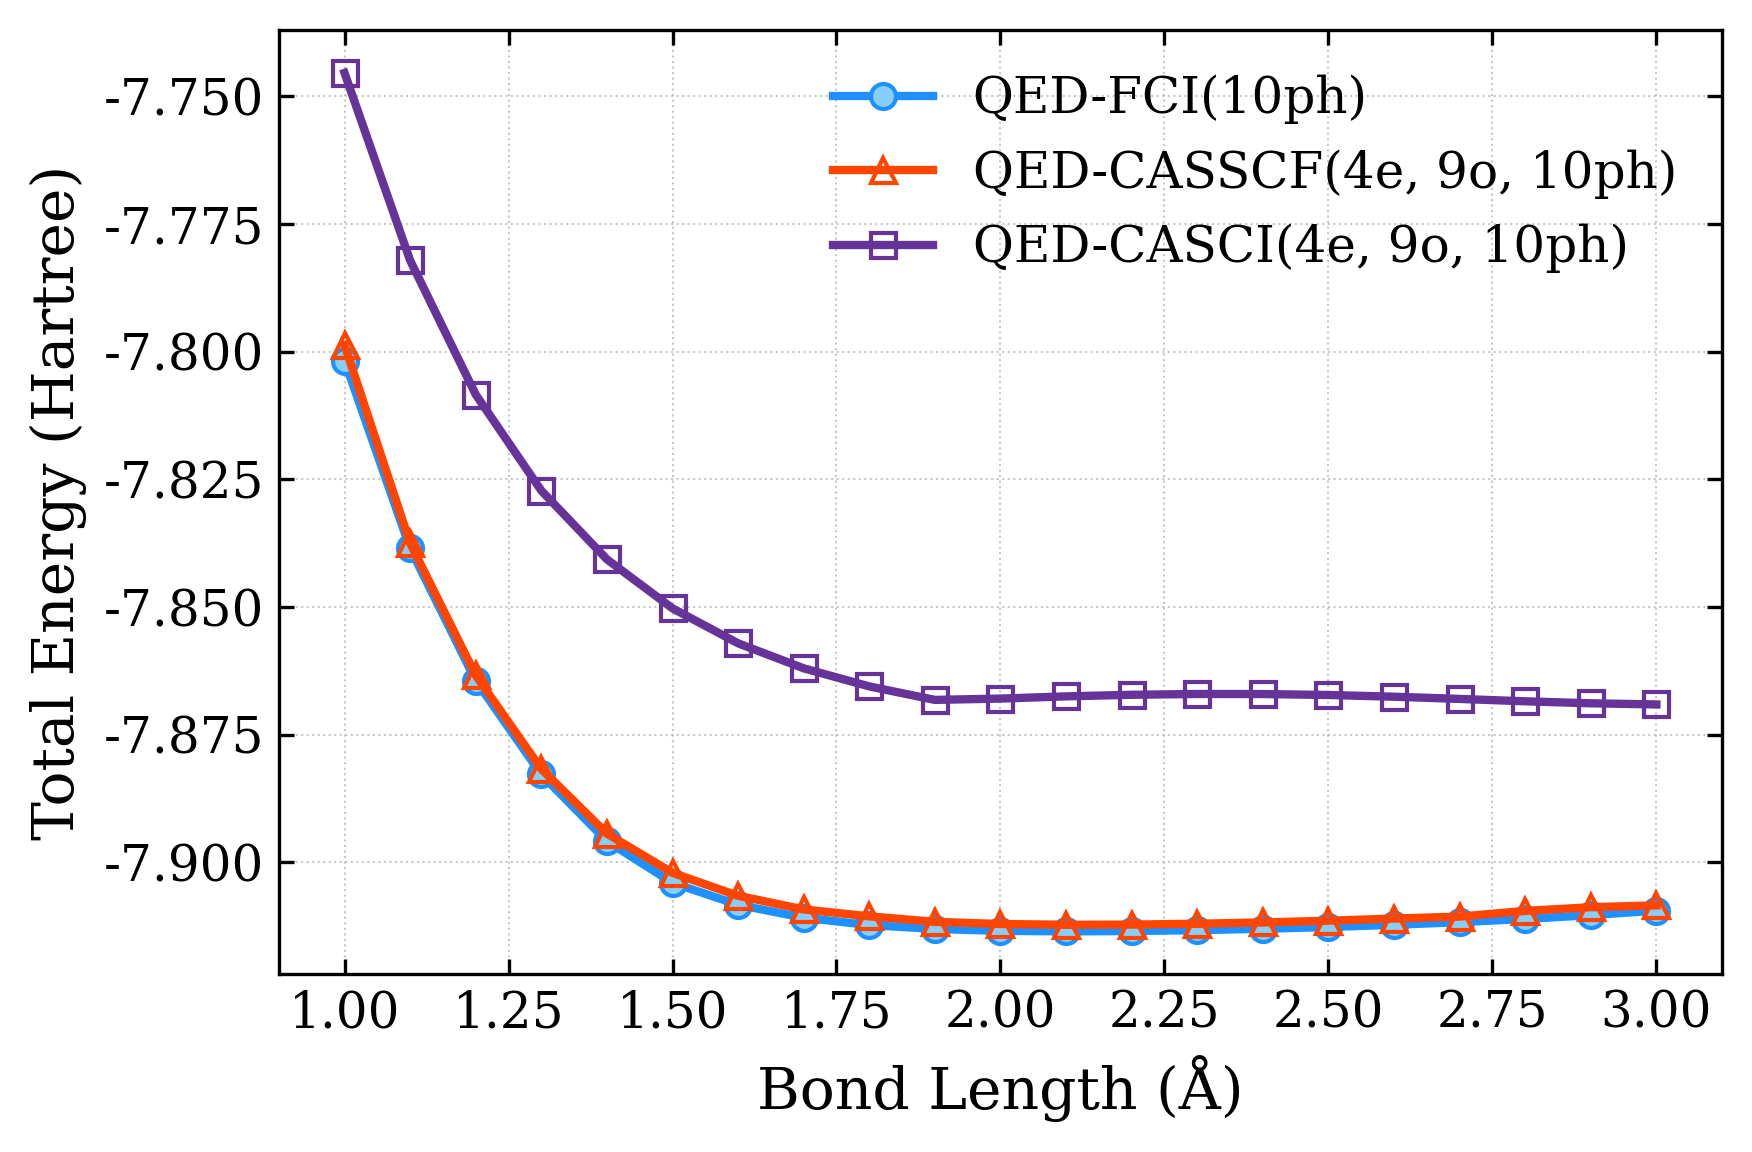

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(r, E_fci[:,2],label=r"QED-FCI(10ph)", **styles["QED-FCI"])
ax.plot(r, E_casscf[:,2],label=r"QED-CASSCF(4e, 9o, 10ph)", **styles["QED-CASSCF"])
ax.plot(r, E_casci[:,2], label=r"QED-CASCI(4e, 9o, 10ph)", **styles["QED-CASCI"])
# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
# Set x-axis tick labels to display 3 decimal places
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)
fig.tight_layout()
fig.savefig("LiH_LP.png", format='png', dpi=600)
plt.show()

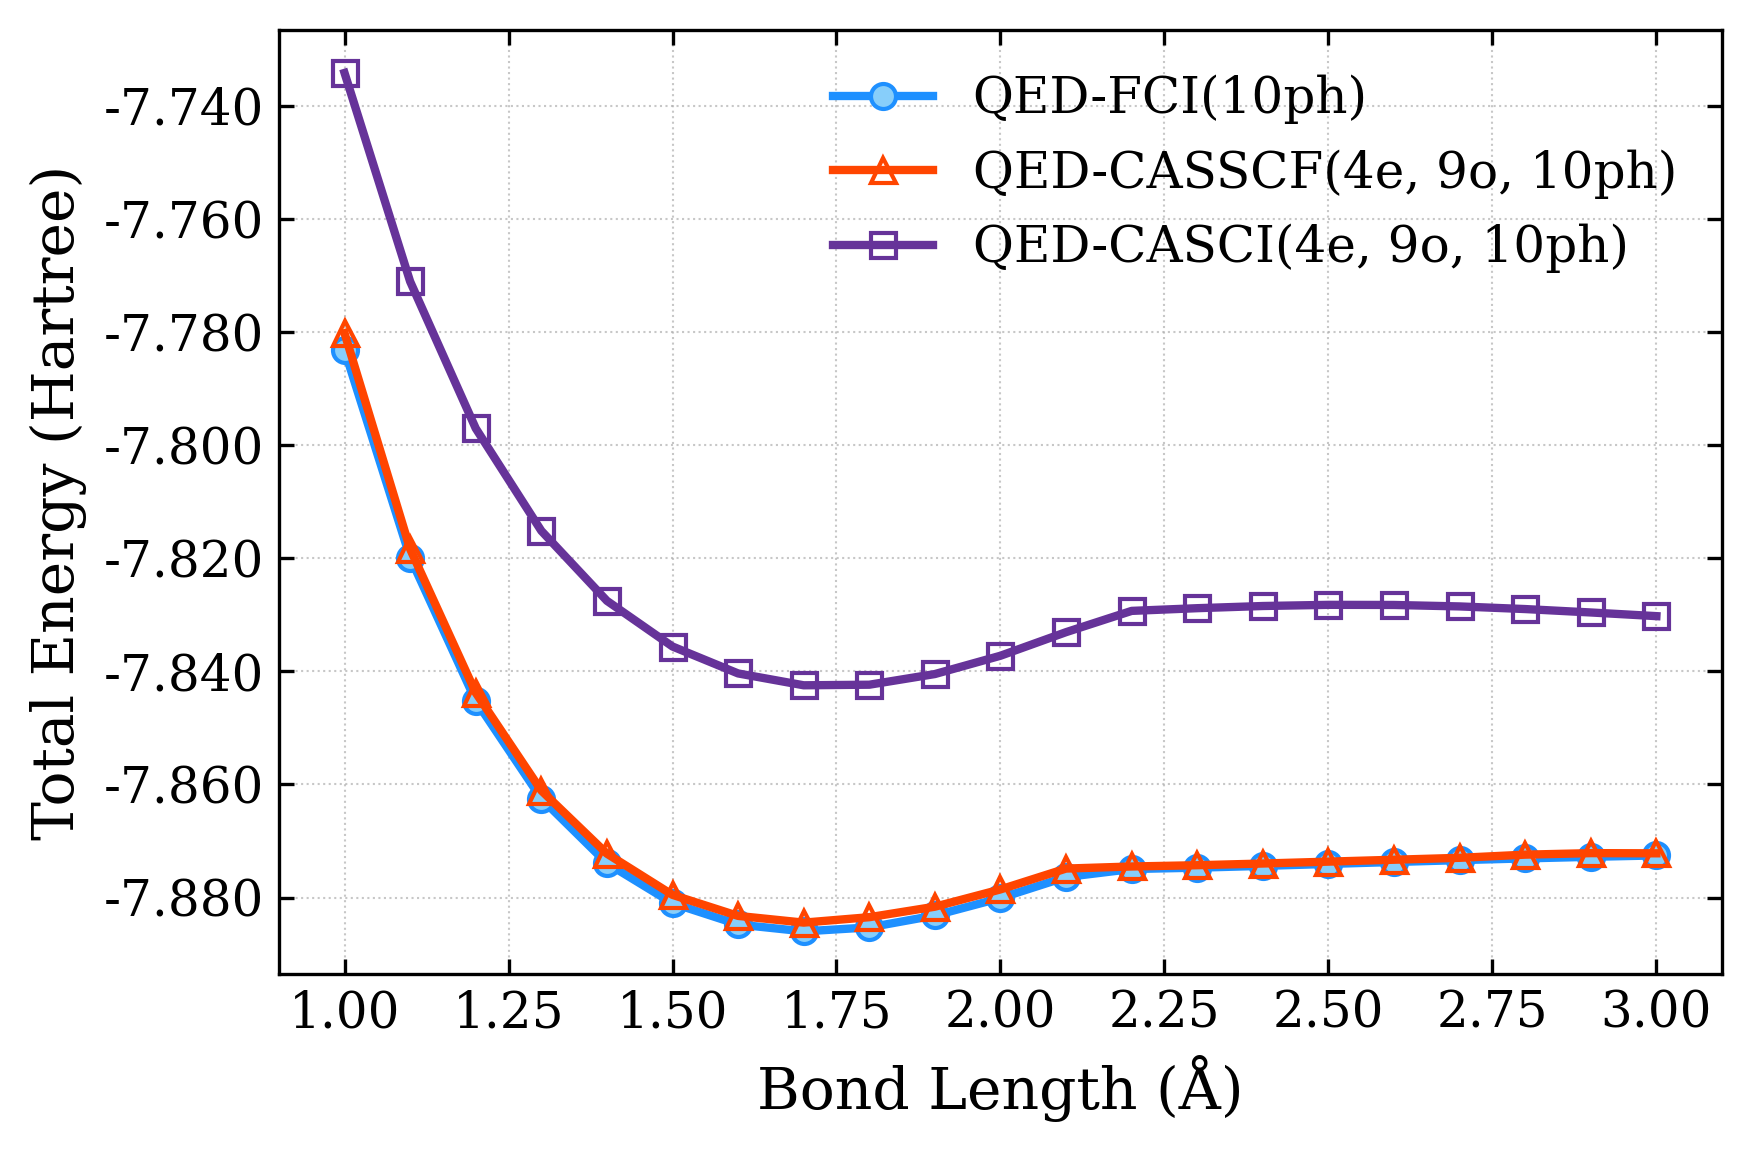

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(r, E_fci[:,3],label=r"QED-FCI(10ph)", **styles["QED-FCI"])
ax.plot(r, E_casscf[:,3],label=r"QED-CASSCF(4e, 9o, 10ph)", **styles["QED-CASSCF"])
ax.plot(r, E_casci[:,3], label=r"QED-CASCI(4e, 9o, 10ph)", **styles["QED-CASCI"])
# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
# Set x-axis tick labels to display 3 decimal places
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)
fig.tight_layout()
fig.savefig("LiH_UP.png", format='png', dpi=600)
plt.show()

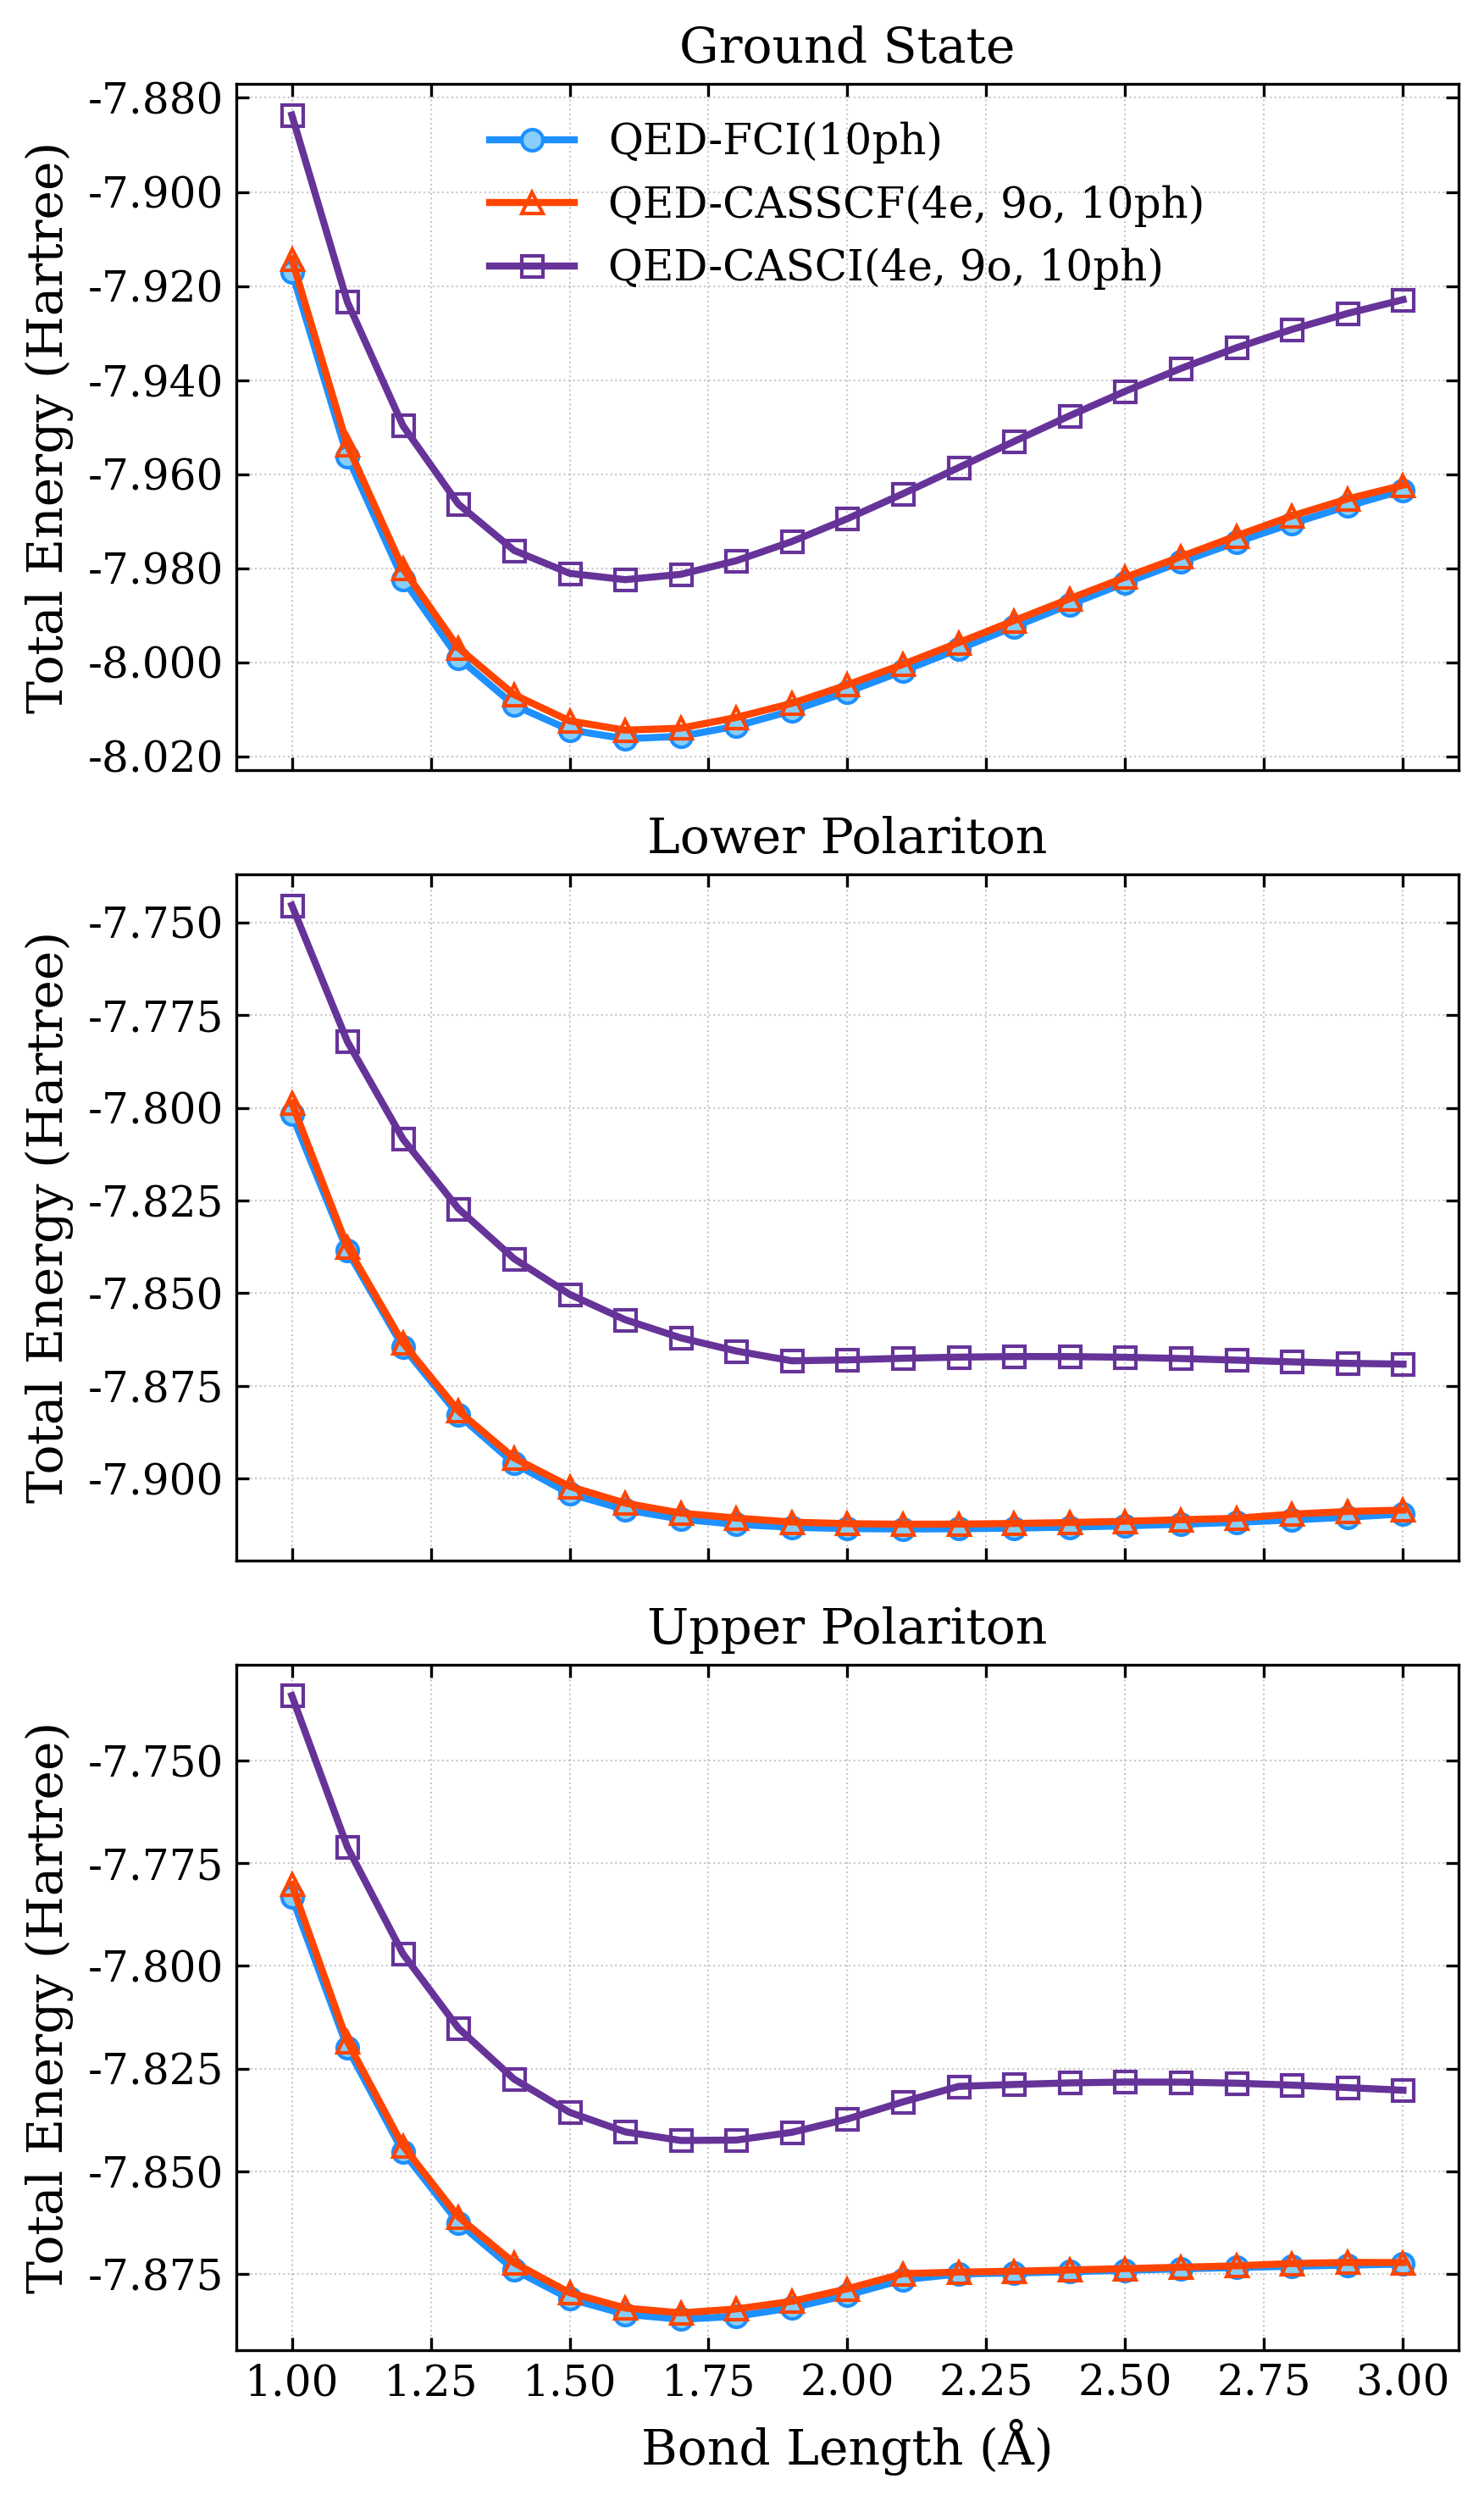

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Use a professional font and improve overall aesthetics
mpl.rcParams.update({
    "text.usetex": False,  # Set to True if using LaTeX rendering
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 300,
    "lines.linewidth": 2,
    "lines.markersize": 6,
})

# Define styles
styles = {
    "QED-FCI": {"color": "dodgerblue", "linestyle": "-", "marker": "o", "markerfacecolor": "lightskyblue"},
    "QED-CASCI": {"color": "rebeccapurple", "linestyle": "-", "marker": "s", "markerfacecolor": "none"},
    "QED-CASSCF": {"color": "orangered", "linestyle": "-", "marker": "^", "markerfacecolor": "none"},
}

# Sample data (replace with your actual data)
import numpy as np


# Create a figure with 3 subplots arranged vertically
fig, ax = plt.subplots(3, 1, figsize=(6, 10), sharex=True) # sharex makes x-axis common

# Plot the first data set (Ground State)
ax[0].plot(r, E_fci[:, 0], label=r"QED-FCI(10ph)", **styles["QED-FCI"])
ax[0].plot(r, E_casscf[:, 0], label=r"QED-CASSCF(4e, 9o, 10ph)", **styles["QED-CASSCF"])
ax[0].plot(r, E_casci[:, 0], label=r"QED-CASCI(4e, 9o, 10ph)", **styles["QED-CASCI"])
ax[0].set_ylabel("Total Energy (Hartree)")
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[0].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax[0].legend(frameon=False, loc='best')
ax[0].tick_params(direction='in', top=True, right=True)
ax[0].set_title("Ground State")

# Plot the second data set (Lower Excited State)
ax[1].plot(r, E_fci[:, 2], label=r"QED-FCI(10ph)", **styles["QED-FCI"])
ax[1].plot(r, E_casscf[:, 2], label=r"QED-CASSCF(4e, 9o, 10ph)", **styles["QED-CASSCF"])
ax[1].plot(r, E_casci[:, 2], label=r"QED-CASCI(4e, 9o, 10ph)", **styles["QED-CASCI"])
ax[1].set_ylabel("Total Energy (Hartree)")
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax[1].tick_params(direction='in', top=True, right=True)
ax[1].set_title("Lower Polariton")

# Plot the third data set (Upper Excited State)
ax[2].plot(r, E_fci[:, 3], label=r"QED-FCI(10ph)", **styles["QED-FCI"])
ax[2].plot(r, E_casscf[:, 3], label=r"QED-CASSCF(4e, 9o, 10ph)", **styles["QED-CASSCF"])
ax[2].plot(r, E_casci[:, 3], label=r"QED-CASCI(4e, 9o, 10ph)", **styles["QED-CASCI"])
ax[2].set_xlabel("Bond Length (Å)")
ax[2].set_ylabel("Total Energy (Hartree)")
ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[2].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[2].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax[2].tick_params(direction='in', top=True, right=True)
ax[2].set_title("Upper Polariton")

fig.tight_layout()
fig.savefig("LiH_Vertical.png", format='png', dpi=600)
plt.show()


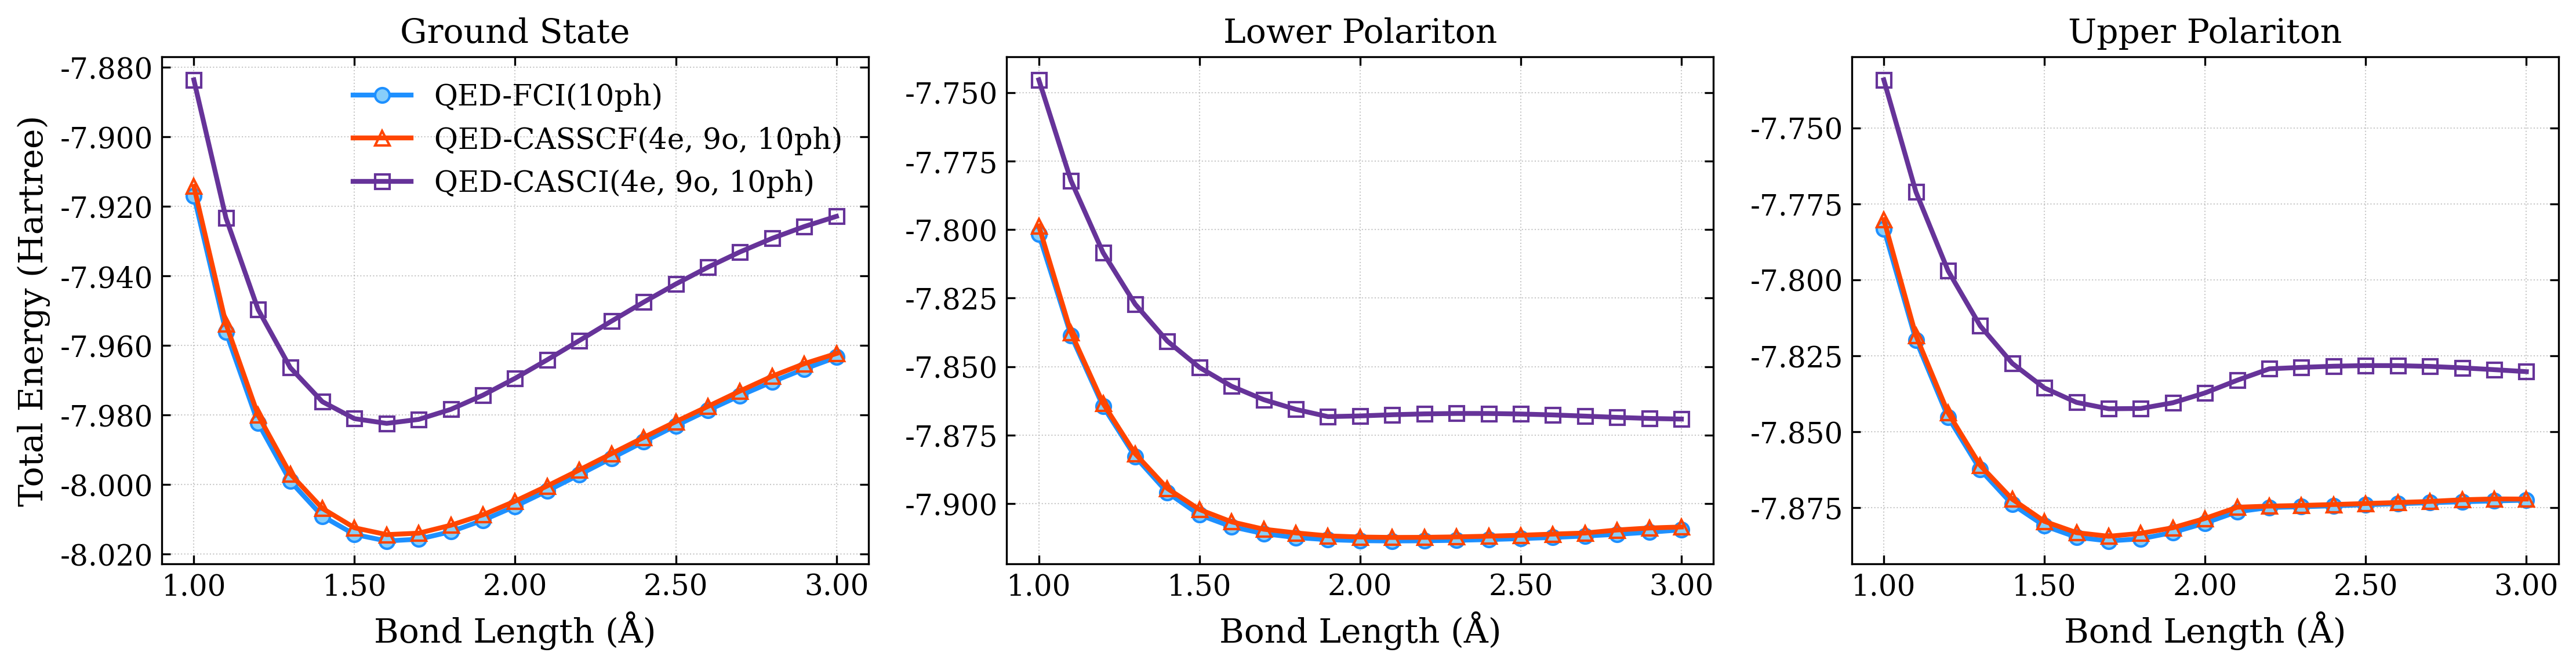

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Use a professional font and improve overall aesthetics
mpl.rcParams.update({
    "text.usetex": False,  # Set to True if using LaTeX rendering
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 300,
    "lines.linewidth": 2,
    "lines.markersize": 6,
})

# Define styles
styles = {
    "QED-FCI": {"color": "dodgerblue", "linestyle": "-", "marker": "o", "markerfacecolor": "lightskyblue"},
    "QED-CASCI": {"color": "rebeccapurple", "linestyle": "-", "marker": "s", "markerfacecolor": "none"},
    "QED-CASSCF": {"color": "orangered", "linestyle": "-", "marker": "^", "markerfacecolor": "none"},
}



# Create a figure with 3 subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharey=False) # sharey makes y-axis common

# Plot the first data set (Ground State)
ax[0].plot(r, E_fci[:, 0], label=r"QED-FCI(10ph)", **styles["QED-FCI"])
ax[0].plot(r, E_casscf[:, 0], label=r"QED-CASSCF(4e, 9o, 10ph)", **styles["QED-CASSCF"])
ax[0].plot(r, E_casci[:, 0], label=r"QED-CASCI(4e, 9o, 10ph)", **styles["QED-CASCI"])
ax[0].set_xlabel("Bond Length (Å)")
ax[0].set_ylabel("Total Energy (Hartree)")
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[0].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax[0].legend(frameon=False, loc='best')
ax[0].tick_params(direction='in', top=True, right=True)
ax[0].set_title("Ground State")

# Plot the second data set (Lower Excited State)
ax[1].plot(r, E_fci[:, 2], label=r"QED-FCI(10ph)", **styles["QED-FCI"])
ax[1].plot(r, E_casscf[:, 2], label=r"QED-CASSCF(4e, 9o, 10ph)", **styles["QED-CASSCF"])
ax[1].plot(r, E_casci[:, 2], label=r"QED-CASCI(4e, 9o, 10ph)", **styles["QED-CASCI"])
ax[1].set_xlabel("Bond Length (Å)")
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax[1].tick_params(direction='in', top=True, right=True)
ax[1].set_title("Lower Polariton")

# Plot the third data set (Upper Excited State)
ax[2].plot(r, E_fci[:, 3], label=r"QED-FCI(10ph)", **styles["QED-FCI"])
ax[2].plot(r, E_casscf[:, 3], label=r"QED-CASSCF(4e, 9o, 10ph)", **styles["QED-CASSCF"])
ax[2].plot(r, E_casci[:, 3], label=r"QED-CASCI(4e, 9o, 10ph)", **styles["QED-CASCI"])
ax[2].set_xlabel("Bond Length (Å)")
ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[2].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[2].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax[2].tick_params(direction='in', top=True, right=True)
ax[2].set_title("Upper Polariton")

fig.tight_layout()
fig.savefig("LiH_Horizontal.png", format='png', dpi=600)
plt.show()